In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.model_selection as cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

In [2]:
original_data= pd.read_csv('adult_dataset_training.csv')

In [3]:
original_data.head()

Unnamed: 0  age         workclass  fnlwgt education  educational-num  \
0       26779   74  Self-emp-not-inc  119129   HS-grad                9   
1       28736   56           Private   98809   7th-8th                4   
2       19225   17         Local-gov  182070      11th                7   
3       36240   45           Private  175262       9th                5   
4       11076   30           Private  224462      11th                7   

       marital-status         occupation relationship                race  \
0  Married-civ-spouse              Sales      Husband               White   
1  Married-civ-spouse  Machine-op-inspct         Wife               White   
2       Never-married      Other-service    Own-child               White   
3  Married-civ-spouse  Handlers-cleaners      Husband  Asian-Pac-Islander   
4  Married-civ-spouse   Transport-moving      Husband               White   

   gender  capital-gain  capital-loss  hours-per-week native-country income  
0    Male             0          2149              20  United-States  <=50K  
1  Female          5013             0              45  United-States  <=50K  
2  Female             0             0              16  United-States  <=50K  
3    Male             0             0              40          India  <=50K  
4    Male             0             0              50  United-States  <=50K

In [4]:
#original_data = original_data.set_index(original_data.columns[0])
original_data['native-country'].unique()

array(['United-States', 'India', 'Yugoslavia', 'Mexico', 'Cuba',
       'Vietnam', 'Germany', 'Philippines', 'Greece', 'Puerto-Rico',
       'Canada', 'El-Salvador', 'Peru', 'China', '?', 'Jamaica',
       'Trinadad&Tobago', 'Columbia', 'South', 'Poland',
       'Dominican-Republic', 'Ecuador', 'England', 'Laos', 'Taiwan',
       'Japan', 'Haiti', 'Guatemala', 'France', 'Portugal', 'Hungary',
       'Honduras', 'Italy', 'Iran', 'Ireland', 'Nicaragua', 'Hong',
       'Outlying-US(Guam-USVI-etc)', 'Thailand', 'Cambodia', 'Scotland',
       'Holand-Netherlands'], dtype=object)

In [5]:
to_drop = [
    'age',
    'gender',
    'race',
    'relationship',
    'education'
]

original_data = original_data.drop(to_drop, axis=1)

In [6]:
def bin_countries(x):
    if x.strip() == 'United-States':
        return  'US'
    else:
        return 'Not_US'
    
original_data['native-country']=original_data['native-country'].apply(bin_countries)

In [7]:
original_data['native-country'].head()

0        US
1        US
2        US
3    Not_US
4        US
Name: native-country, dtype: object

In [8]:
def binarise_features(df):
    result = df.copy()
    binarisers = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            if len(result[column].unique()) >2 :
                binarisers[column] = preprocessing.LabelBinarizer()
                result = result.join(pd.DataFrame(binarisers[column].fit_transform(result[column]), columns=binarisers[column].classes_), lsuffix=column)
                result = result.drop(column, axis=1)
    return result, binarisers

In [9]:
#binarise features with more than 2 unique values
binarise_data, binarisers = binarise_features(original_data)

In [10]:
binarise_data.head()

Unnamed: 0  fnlwgt  educational-num  capital-gain  capital-loss  \
0       26779  119129                9             0          2149   
1       28736   98809                4          5013             0   
2       19225  182070                7             0             0   
3       36240  175262                5             0             0   
4       11076  224462                7             0             0   

   hours-per-week native-country income  ?occupation  Federal-gov  ...  \
0              20             US  <=50K            0            0  ...   
1              45             US  <=50K            0            0  ...   
2              16             US  <=50K            0            0  ...   
3              40         Not_US  <=50K            0            0  ...   
4              50             US  <=50K            0            0  ...   

   Farming-fishing  Handlers-cleaners  Machine-op-inspct  Other-service  \
0                0                  0                  0              0   
1                0                  0                  1              0   
2                0                  0                  0              1   
3                0                  1                  0              0   
4                0                  0                  0              0   

   Priv-house-serv  Prof-specialty  Protective-serv  Sales  Tech-support  \
0                0               0                0      1             0   
1                0               0                0      0             0   
2                0               0                0      0             0   
3                0               0                0      0             0   
4                0               0                0      0             0   

   Transport-moving  
0                 0  
1                 0  
2                 0  
3                 0  
4                 1  

[5 rows x 39 columns]

In [11]:
#Fucntion to encode the categorical data
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [12]:
#Encode categorical data like marital status, occupation and relationship as integers
encoded_data, encoders = number_encode_features(binarise_data)

In [13]:
encoded_data.head()

Unnamed: 0  fnlwgt  educational-num  capital-gain  capital-loss  \
0       26779  119129                9             0          2149   
1       28736   98809                4          5013             0   
2       19225  182070                7             0             0   
3       36240  175262                5             0             0   
4       11076  224462                7             0             0   

   hours-per-week  native-country  income  ?occupation  Federal-gov  ...  \
0              20               1       0            0            0  ...   
1              45               1       0            0            0  ...   
2              16               1       0            0            0  ...   
3              40               0       0            0            0  ...   
4              50               1       0            0            0  ...   

   Farming-fishing  Handlers-cleaners  Machine-op-inspct  Other-service  \
0                0                  0                  0              0   
1                0                  0                  1              0   
2                0                  0                  0              1   
3                0                  1                  0              0   
4                0                  0                  0              0   

   Priv-house-serv  Prof-specialty  Protective-serv  Sales  Tech-support  \
0                0               0                0      1             0   
1                0               0                0      0             0   
2                0               0                0      0             0   
3                0               0                0      0             0   
4                0               0                0      0             0   

   Transport-moving  
0                 0  
1                 0  
2                 0  
3                 0  
4                 1  

[5 rows x 39 columns]

In [14]:
encoded_data = encoded_data.drop('Unnamed: 0', axis=1)

In [15]:
#Train-validation split
X_train, X_test, y_train, y_test = train_test_split(encoded_data.drop('income', axis=1), encoded_data["income"], train_size=0.8)

In [16]:
y_train.mean()

0.24083434640731974

In [17]:
#scaling feature variables
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype(np.float64)), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test.astype(np.float64)), columns=X_test.columns)

In [18]:
X_test.head()

fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0  0.645158        -0.424156     -0.145015     -0.214394       -0.032393   
1 -0.440091         1.530187     -0.145015     -0.214394       -0.353346   
2 -0.109552        -0.424156     -0.145015     -0.214394       -0.032393   
3 -0.228887        -0.424156     -0.145015     -0.214394        0.769990   
4  0.404175        -0.424156     -0.145015     -0.214394       -0.032393   

   native-country  ?occupation  Federal-gov  Local-gov  Never-worked  ...  \
0        0.339649    -0.245219    -0.173946  -0.262359     -0.011313  ...   
1        0.339649    -0.245219    -0.173946  -0.262359     -0.011313  ...   
2        0.339649    -0.245219    -0.173946  -0.262359     -0.011313  ...   
3        0.339649    -0.245219    -0.173946  -0.262359     -0.011313  ...   
4        0.339649    -0.245219    -0.173946  -0.262359     -0.011313  ...   

   Farming-fishing  Handlers-cleaners  Machine-op-inspct  Other-service  \
0        -0.175307          -0.209563           3.927549      -0.336241   
1        -0.175307          -0.209563          -0.254612      -0.336241   
2        -0.175307           4.771828          -0.254612      -0.336241   
3        -0.175307           4.771828          -0.254612      -0.336241   
4        -0.175307          -0.209563           3.927549      -0.336241   

   Priv-house-serv  Prof-specialty  Protective-serv     Sales  Tech-support  \
0        -0.069207       -0.380654        -0.144578 -0.359134     -0.171984   
1        -0.069207        2.627055        -0.144578 -0.359134     -0.171984   
2        -0.069207       -0.380654        -0.144578 -0.359134     -0.171984   
3        -0.069207       -0.380654        -0.144578 -0.359134     -0.171984   
4        -0.069207       -0.380654        -0.144578 -0.359134     -0.171984   

   Transport-moving  
0         -0.224593  
1         -0.224593  
2         -0.224593  
3         -0.224593  
4         -0.224593  

[5 rows x 37 columns]

/Users/Servini/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 0.648025


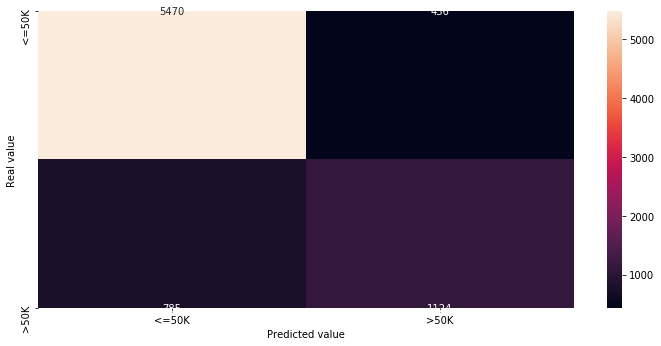

In [19]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["income"].classes_, yticklabels=encoders["income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))

In [20]:
from sklearn import tree

F1 score: 0.600000


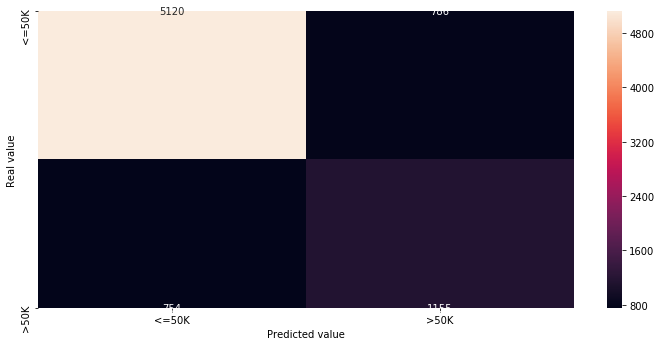

In [21]:
clf= tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["income"].classes_, yticklabels=encoders["income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))


In [22]:
from sklearn.ensemble import RandomForestClassifier

F1 score: 0.627986


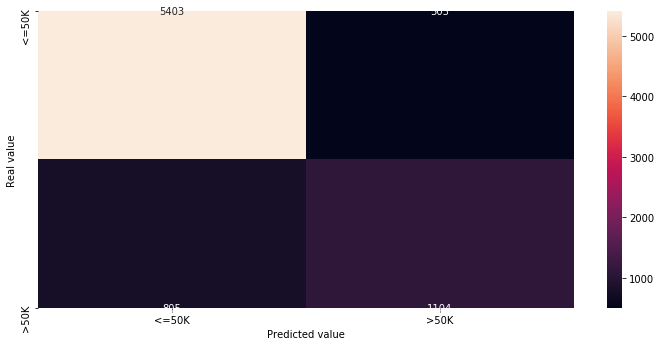

In [23]:
clt = RandomForestClassifier(n_estimators=10, max_depth=None,random_state=0)
clt.fit(X_train, y_train)
y_pred = clt.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["income"].classes_, yticklabels=encoders["income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))

In [95]:
from fairml import audit_model
from fairml import plot_dependencies

Feature: fnlwgt,	 Importance: 0.0002559181062060141
Feature: educational-num,	 Importance: 0.1708253358925144
Feature: capital-gain,	 Importance: 0.07229686500319897
Feature: capital-loss,	 Importance: 0.025207933461292388
Feature: hours-per-week,	 Importance: 0.0690978886756238
Feature: native-country,	 Importance: 0.009852847088931542
Feature: ?occupation,	 Importance: -0.02072936660268714
Feature: Federal-gov,	 Importance: 0.00946896992962252
Feature: Local-gov,	 Importance: -0.0060140754958413305
Feature: Never-worked,	 Importance: 0.00473448496481126
Feature: Private,	 Importance: 0.03723608445297505
Feature: Self-emp-inc,	 Importance: 0.025335892514395393
Feature: Self-emp-not-inc,	 Importance: -0.017658349328214973
Feature: State-gov,	 Importance: -0.0014075495841330773
Feature: Without-pay,	 Importance: -0.00038387715930902113
Feature: Divorced,	 Importance: -0.021625079974408188
Feature: Married-AF-spouse,	 Importance: 0.0
Feature: Married-civ-spouse,	 Importance: 0.1804222648

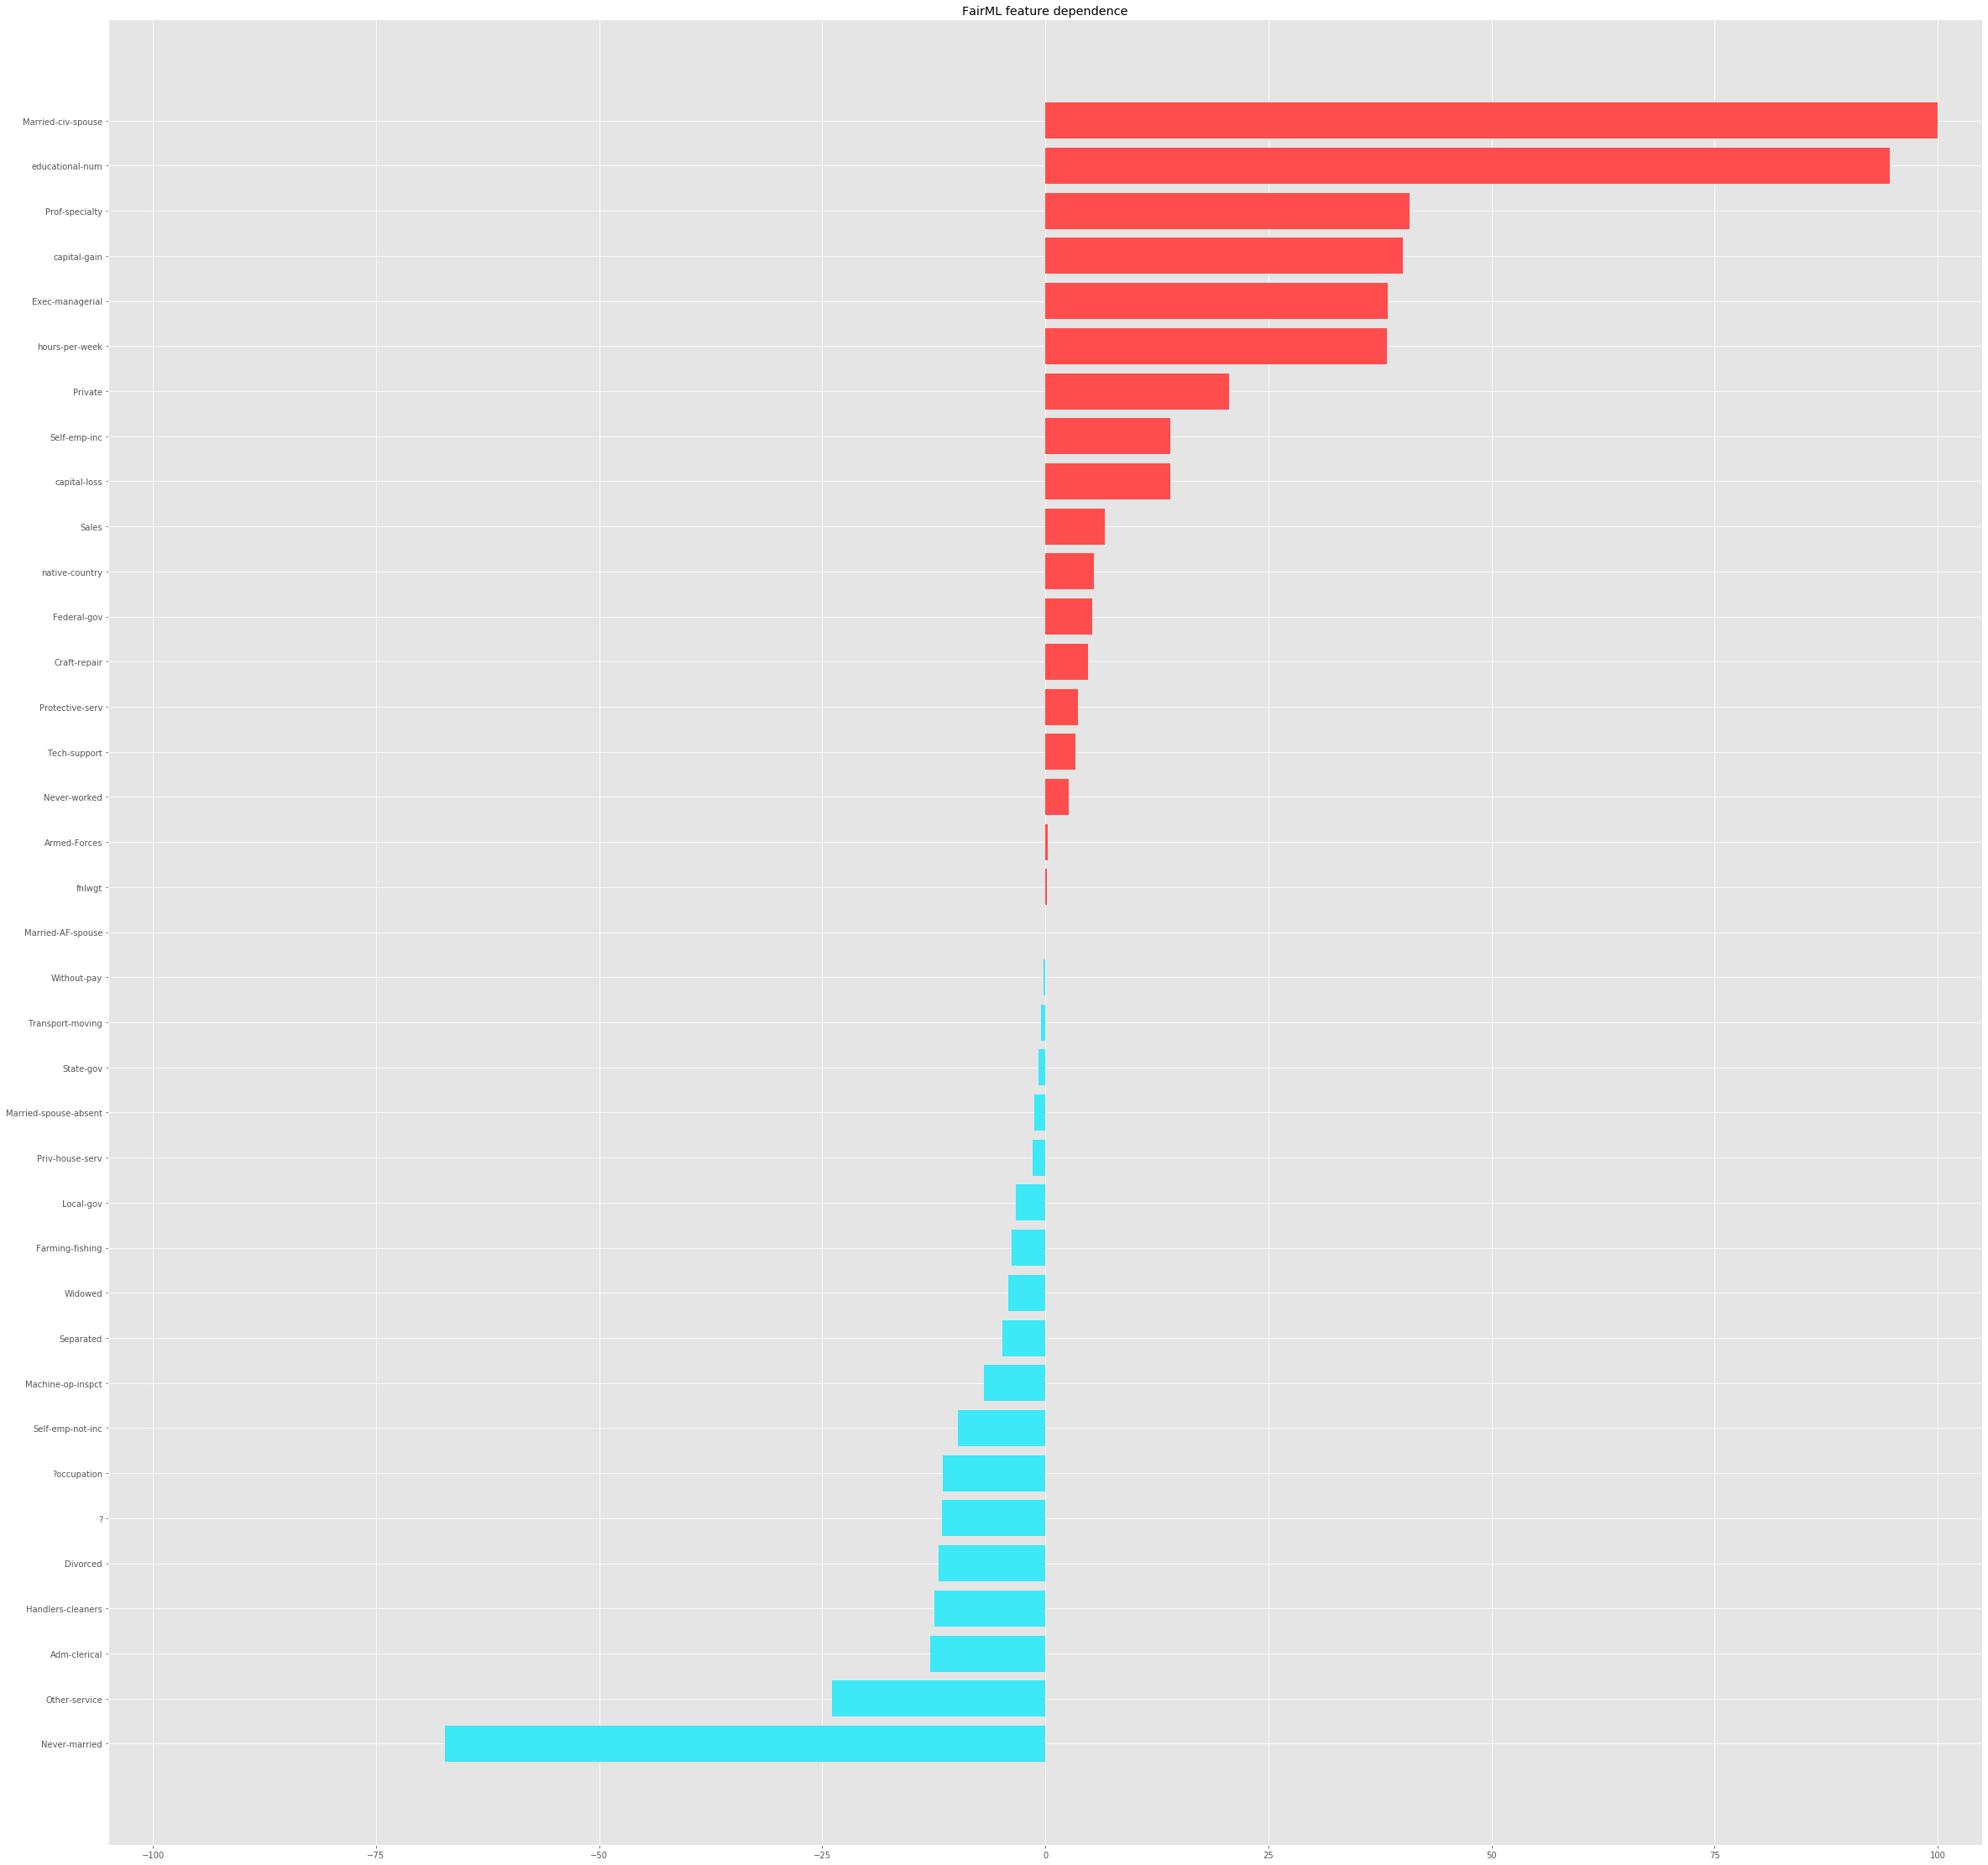

In [96]:
#  call audit model with model
total, _ = audit_model(cls.predict, X_test)

# print feature importance
print(total)

# generate feature dependence plot
fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence",
    fig_size=(40, 40)
    
)
plt.savefig("fairml_ldp.eps", transparent=False, bbox_inches='tight')

Feature: age,	 Importance: 0.07690339091490724
Feature: workclass,	 Importance: -0.025335892514395393
Feature: fnlwgt,	 Importance: 0.003198976327575176
Feature: education,	 Importance: 0.03147792706333973
Feature: educational-num,	 Importance: 0.12412028150991683
Feature: marital-status,	 Importance: -0.06461932181701856
Feature: occupation,	 Importance: 0.02507997440818938
Feature: relationship,	 Importance: -0.09968010236724248
Feature: race,	 Importance: 0.019577735124760076
Feature: gender,	 Importance: 0.08841970569417787
Feature: capital-gain,	 Importance: 0.08253358925143954
Feature: capital-loss,	 Importance: 0.023160588611644273
Feature: hours-per-week,	 Importance: 0.07152911068458094
Feature: native-country,	 Importance: 0.0025591810620601407


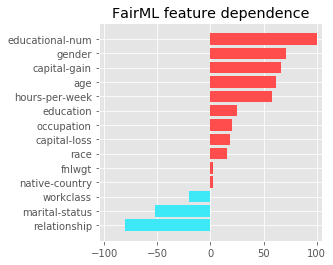

In [37]:
#  call audit model with model
total, _ = audit_model(cls.predict, X_test)

# print feature importance
print(total)

# generate feature dependence plot
fig = plot_dependencies(
    total.median(),
    reverse_values=False,
    title="FairML feature dependence"
)
plt.savefig("fairml_ldp.eps", transparent=False, bbox_inches='tight')

In [49]:
type(total)

fairml.orthogonal_projection.AuditResult